In [ ]:
"""
Foram utilizadas a pasta de conversas do Whatsapp do Curadobia para extrair as mensagens.
"""

'\nForam utilizadas a pasta de conversas do Whatsapp do Curadobia para extrair as mensagens.\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Replace 'path/to/your/file.zip' with the actual path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/curadobia/Conversas Whatsapp Clientes.zip'
extracted_dir_path = '/content/extracted_zip_contents'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_path)
    print(f"File extracted successfully to {extracted_dir_path}")

    # List the contents of the extracted directory
    print("\nContents of the extracted directory:")
    for root, dirs, files in os.walk(extracted_dir_path):
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name))

except FileNotFoundError:
    print(f"Error: The zip file was not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: The file at {zip_file_path} is not a valid zip file")
except Exception as e:
    print(f"An error occurred: {e}")

File extracted successfully to /content/extracted_zip_contents

Contents of the extracted directory:
/content/extracted_zip_contents/Conversas Whatsapp Clientes
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Wpp conversas - 03-25 - 05-25
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25/WhatsApp Chat - Fernanda Fuzinatto - Cliente Especial.zip
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25/WhatsApp Chat - Carla Strauss - Cliente.zip
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25/WhatsApp Chat - Marcia P C Spedicato - Cliente.zip
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25/WhatsApp Chat - Gisela Mation - Cliente.zip
/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 

In [ ]:
import re
from datetime import datetime
from typing import List, Dict, Optional

# Suporta dois formatos comuns de export:
# 1) [20/09/2024 15:29:57] Nome: Mensagem
# 2) 20/09/2024, 15:29 - Nome: Mensagem   (fallback)
PAT_BRACKETS = re.compile(r'^\[(\d{1,2}/\d{1,2}/\d{2,4}) (\d{2}:\d{2}(?::\d{2})?)\] (.*?):\s?(.*)$')
PAT_DASH     = re.compile(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{2}:\d{2}) - (.*?):\s?(.*)$')

# Remove caracteres invisíveis que costumam aparecer no export
INVISIBLE_CHARS = re.compile(r'[\u200e\u200f\u202a-\u202e]')

def _clean(s: str) -> str:
    return INVISIBLE_CHARS.sub('', s)

def _parse_ts(date_str: str, time_str: str) -> Optional[datetime]:
    combos = [
        ("%d/%m/%Y %H:%M:%S", f"{date_str} {time_str}"),
        ("%d/%m/%Y %H:%M",    f"{date_str} {time_str}"),
        ("%d/%m/%y %H:%M:%S", f"{date_str} {time_str}"),
        ("%d/%m/%y %H:%M",    f"{date_str} {time_str}"),
    ]
    for fmt, s in combos:
        try:
            return datetime.strptime(s, fmt)
        except ValueError:
            pass
    return None  # caso muito fora do padrão

def parse_whatsapp_chat(path: str) -> List[Dict]:
    records: List[Dict] = []
    current: Optional[Dict] = None

    with open(path, "r", encoding="utf-8") as f:
        for raw in f:
            line = _clean(raw.rstrip("\n"))

            # Detecta novo cabeçalho de mensagem
            m = PAT_BRACKETS.match(line) or PAT_DASH.match(line)
            if m:
                # salva a mensagem anterior
                if current:
                    records.append(current)
                date_str, time_str, sender, first_text = m.groups()
                ts = _parse_ts(date_str, time_str)
                current = {
                    "timestamp": ts,
                    "sender": sender.strip(),
                    "message": first_text.strip()
                }
            else:
                # linha de continuação (inclui linhas em branco)
                if current is not None:
                    # preserva quebras de linha na mensagem
                    if current["message"]:
                        current["message"] += "\n" + line
                    else:
                        current["message"] = line
                else:
                    # lixo de cabeçalho antes da primeira mensagem — ignora
                    continue

    if current:
        records.append(current)
    return records

In [ ]:
chat_dir = '/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25'

# list files on chat_dir
chat_files = os.listdir(chat_dir)
print(chat_files)
print(len(chat_files))

for file in chat_files:
    print('-' * 50)
    print(file)
    path_file = os.path.join(chat_dir, file)
    output_dir = os.path.join('/content/messages', file.split('.')[0])
    print(path_file)
    print(output_dir)
    try:
      with zipfile.ZipFile(path_file, 'r') as zip_ref:
          zip_ref.extractall(output_dir)
      print(f"File extracted successfully to {output_dir}")

      # List the contents of the extracted directory
      print("\nContents of the extracted directory:")
      for root, dirs, files in os.walk(output_dir):
          for name in files:
              print(os.path.join(root, name))
          for name in dirs:
              print(os.path.join(root, name))
      # ler _chat.txt
      path = os.path.join(output_dir, '_chat.txt')
      msgs = parse_whatsapp_chat(path)
      print(msgs)

    except FileNotFoundError:
      print(f"Error: The zip file was not found at {path_file}")
    except zipfile.BadZipFile:
      print(f"Error: The file at {path_file} is not a valid zip file")

['WhatsApp Chat - Fernanda Fuzinatto - Cliente Especial.zip', 'WhatsApp Chat - Carla Strauss - Cliente.zip', 'WhatsApp Chat - Marcia P C Spedicato - Cliente.zip', 'WhatsApp Chat - Gisela Mation - Cliente.zip', 'WhatsApp Chat - Roberta Tomazini  (1ªs Clientes).zip', 'WhatsApp Chat - Tatiane Pires  (1ªs Clientes).zip', 'WhatsApp Chat - Beatriz Kesselring - Cliente.zip', 'WhatsApp Chat - Ana Carolina Gomiero  (1ªs Clientes).zip', 'WhatsApp Chat - Alessandra Libman - Cliente.zip', 'WhatsApp Chat - Karyna - Cliente.zip', 'WhatsApp Chat - Julia Campelo - Cliente.zip', 'WhatsApp Chat - Cintya Gil - Cliente.zip', 'WhatsApp Chat - Luciana Savaris  (1ªs Clientes).zip', 'WhatsApp Chat - Fátima Modenese - Cliente.zip', 'WhatsApp Chat - +55 18 99781-2852.zip', 'WhatsApp Chat - Patricia Duarte (1ªs Clientes).zip', 'WhatsApp Chat - Laís Peretto.zip', 'WhatsApp Chat - Marina Nogueira Resende - Cliente.zip', 'WhatsApp Chat - Giovana Ferme - Cliente.zip', 'WhatsApp Chat - Marcela Cascardo - Cliente Es

In [ ]:
import os
import zipfile
import pandas as pd

# Base onde estão os .zip das conversas
chat_dir = ['/content/extracted_zip_contents/Conversas Whatsapp Clientes/Conversas WPP - 09-24 até 02-25', '/content/extracted_zip_contents/Conversas Whatsapp Clientes/Wpp conversas - 03-25 - 05-25']
# Pasta para extrair cada chat
output_base = '/content/messages'
os.makedirs(output_base, exist_ok=True)

def find_chat_txt(extracted_dir: str):
    """Tenta achar _chat.txt; se não existir, pega o primeiro .txt que aparecer."""
    p1 = os.path.join(extracted_dir, '_chat.txt')
    if os.path.isfile(p1):
        return p1
    candidates = []
    for root, _, files in os.walk(extracted_dir):
        for fname in files:
            if fname.lower().endswith('.txt'):
                candidates.append(os.path.join(root, fname))
    return candidates[0] if candidates else None

all_rows = []
for chat_path in chat_dir:
  for file in os.listdir(chat_path):
      if not file.lower().endswith('.zip'):
          continue

      zip_path = os.path.join(chat_path, file)
      conversation_name = os.path.splitext(file)[0]
      out_dir = os.path.join(output_base, conversation_name)
      os.makedirs(out_dir, exist_ok=True)

      try:
          with zipfile.ZipFile(zip_path, 'r') as zf:
              zf.extractall(out_dir)

          chat_txt = find_chat_txt(out_dir)
          if not chat_txt:
              print(f'Nenhum .txt encontrado em {zip_path}, pulando…')
              continue

          messages = parse_whatsapp_chat(chat_txt)
          for m in messages:
              all_rows.append({
                  "conversation_name": conversation_name,
                  "timestamp": m.get("timestamp"),
                  "sender": m.get("sender"),
                  "message": m.get("message"),
              })

      except zipfile.BadZipFile:
          print(f'Arquivo ZIP inválido: {zip_path}')
      except Exception as e:
          print(f'Erro processando {zip_path}: {e}')

# Monta o DataFrame final
df = pd.DataFrame(all_rows, columns=["conversation_name", "timestamp", "sender", "message"])
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.sort_values(["conversation_name", "timestamp"]).reset_index(drop=True)

print(df.shape)
df.head()
# (Opcional) salvar
df.to_csv("/content/all_conversations_messages.csv", index=False)


(1253, 4)


In [ ]:
# consolidação mensagem do instagram

In [ ]:
# ler csv com dataframe
insta_df = pd.read_csv("/content/drive/MyDrive/curadobia/Consolidação das mensagens do INSTAGRAM.csv")
insta_df.head()

,Usuário,Data/Hora,Remetente,Mensagem,Tipo de Conteúdo
0,biapaesdebarros_1418872999507501,2024-07-02 12:29,curadobia,you sent an attachment.,texto
1,brendaluchese_1482641736467533,2024-07-02 12:29,curadobia,you sent an attachment.,texto
2,biapaesdebarros_1418872999507501,2024-07-02 12:29,cliente,😍,texto
3,brendaluchese_1482641736467533,2024-07-02 12:29,cliente,curtiu uma mensagem,texto
4,brendaluchese_1482641736467533,2024-07-02 12:29,cliente,😍 body mybasic,texto


In [ ]:
insta_df['Tipo de Conteúdo'].unique()

array(['texto', 'indefinido', 'link', 'imagem'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import hashlib
import re

# ---------- helpers ----------
def make_message_id(row):
    base = f"{row.platform}|{row.conversation_id}|{row.timestamp}|{row.sender}|{row.message}"
    return hashlib.md5(base.encode("utf-8")).hexdigest()[:12]

def to_bool(s):
    return bool(s) if not pd.isna(s) else False

url_re = re.compile(r"https?://\S+", re.I)

# ---------- WhatsApp -> schema comum ----------
# df: conversation_name, timestamp, sender, message
wa = df.copy()

wa = wa.rename(columns={
    "conversation_name": "conversation_id",
    "sender": "sender",
    "message": "message",
    "timestamp": "timestamp",
})

wa["platform"] = "whatsapp"
wa["content_type"] = "texto"  # default

# papel/direção por heurística (ajuste se tiver uma lista de atendentes)
is_client_wa = wa["sender"].fillna("").str.contains("cliente", case=False, na=False)
wa["sender_role"] = np.where(is_client_wa, "cliente", "time")
wa["direction"]   = np.where(is_client_wa, "in", "out")

# flags rápidas
wa["has_url"]   = wa["message"].fillna("").str.contains(url_re)
wa["has_media"] = wa["message"].fillna("").str.contains(
    "arquivo de mídia oculto|arquivo de mídia omitido", case=False, na=False
)
wa["is_system"] = wa["message"].fillna("").str.match(
    r"^(As mensagens e ligações são protegidas|Mensagem apagada|Você (adicionou|removeu|criou))",
    case=False
)

# ---------- Instagram -> schema comum ----------
# insta_df: Usuário, Data/Hora, Remetente, Mensagem, Tipo de Conteúdo
ig = insta_df.copy()

ig = ig.rename(columns={
    "Usuário": "conversation_id",
    "Data/Hora": "timestamp",
    "Remetente": "sender",
    "Mensagem": "message",
    "Tipo de Conteúdo": "content_type",
})

ig["platform"] = "instagram"

# normaliza timestamp
ig["timestamp"] = pd.to_datetime(ig["timestamp"], errors="coerce")
# normaliza content_type para minúsculas
ig["content_type"] = ig["content_type"].astype(str).str.strip().str.lower()
ig.loc[ig["content_type"].isin(["nan", "none", "indefinido"]), "content_type"] = pd.NA

# papel/direção (no seu CSV, Remetente é "cliente" ou "curadobia")
is_client_ig = ig["sender"].astype(str).str.casefold().eq("cliente")
ig["sender_role"] = np.where(is_client_ig, "cliente", "time")
ig["direction"]   = np.where(is_client_ig, "in", "out")

# flags
ig["has_url"]   = ig["message"].fillna("").str.contains(url_re)
ig["has_media"] = ig["content_type"].isin(["imagem", "vídeo", "video", "sticker", "gif"])
ig["is_system"] = ig["message"].fillna("").str.match(
    r"^(curtiu uma mensagem|you sent an attachment\.)", case=False
)

# ---------- concatena ----------
common_cols = [
    "platform", "conversation_id", "timestamp",
    "sender", "sender_role", "direction",
    "message", "content_type",
    "has_url", "has_media", "is_system"
]

all_msgs = pd.concat([wa[common_cols], ig[common_cols]], ignore_index=True)

# ordena e cria turn_index por conversa (por plataforma)
all_msgs = all_msgs.sort_values(["platform", "conversation_id", "timestamp"]).reset_index(drop=True)
all_msgs["turn_index"] = all_msgs.groupby(["platform", "conversation_id"]).cumcount()

# id único por mensagem
all_msgs["message_id"] = all_msgs.apply(make_message_id, axis=1)

# (opcional) métricas de texto
all_msgs["char_len"] = all_msgs["message"].fillna("").str.len()
all_msgs["word_len"] = all_msgs["message"].fillna("").str.split().str.len()

# (opcional) remove duplicados exatos
all_msgs = all_msgs.drop_duplicates(
    subset=["platform","conversation_id","timestamp","sender","message"]
).reset_index(drop=True)

print(all_msgs.shape)
all_msgs.head()

# salvar se quiser
all_msgs.to_csv("/content/all_msgs_whatsapp_instagram.csv", index=False)

(3155, 15)


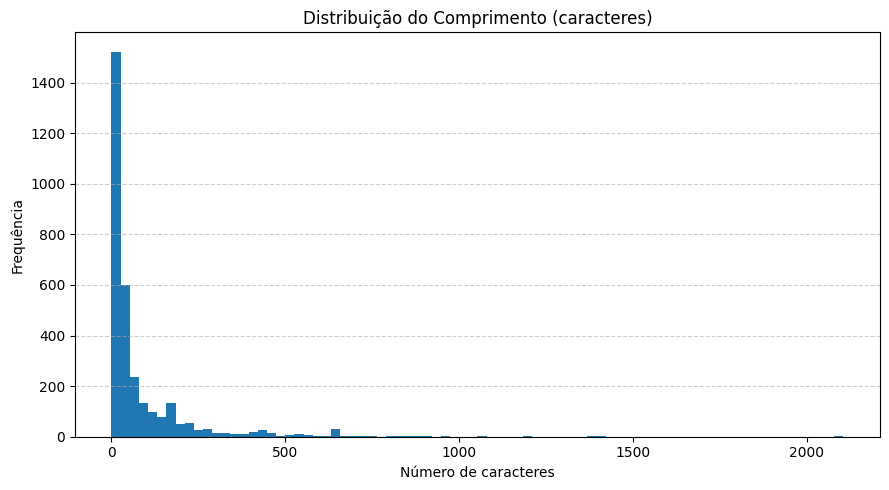

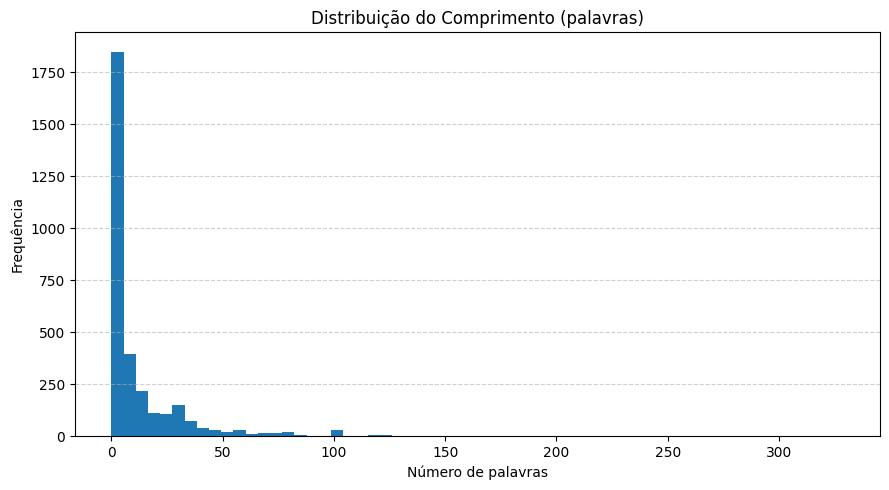

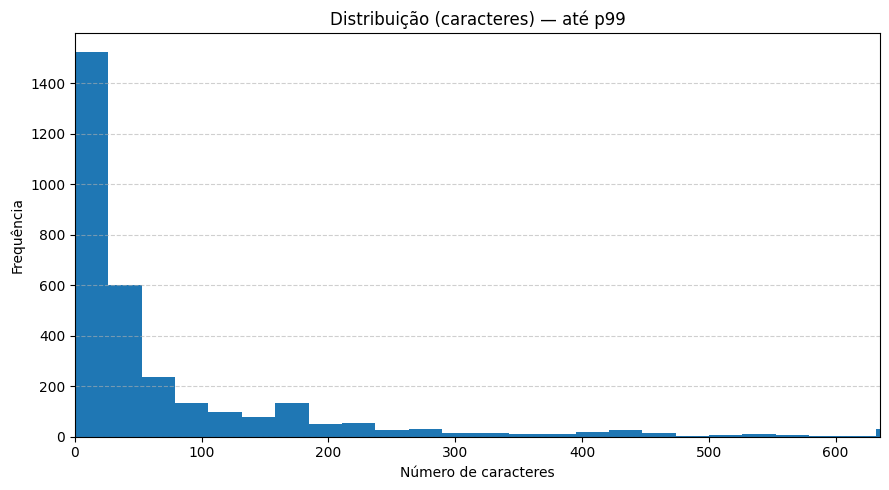

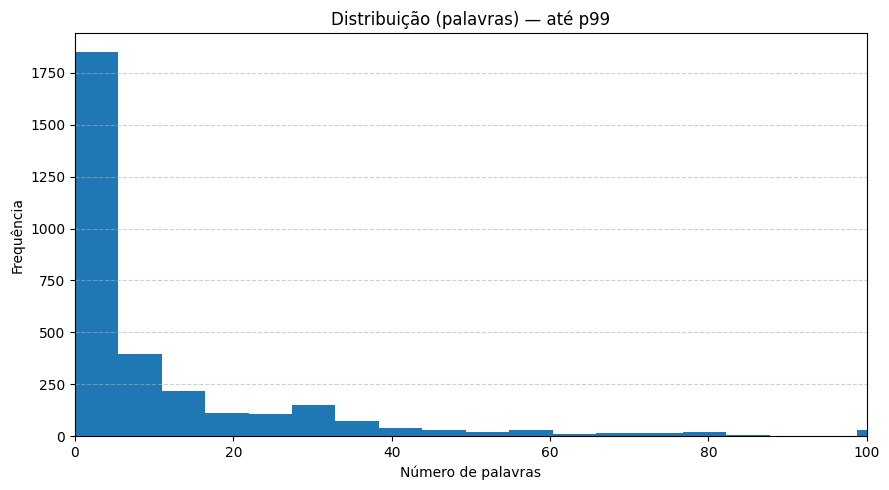

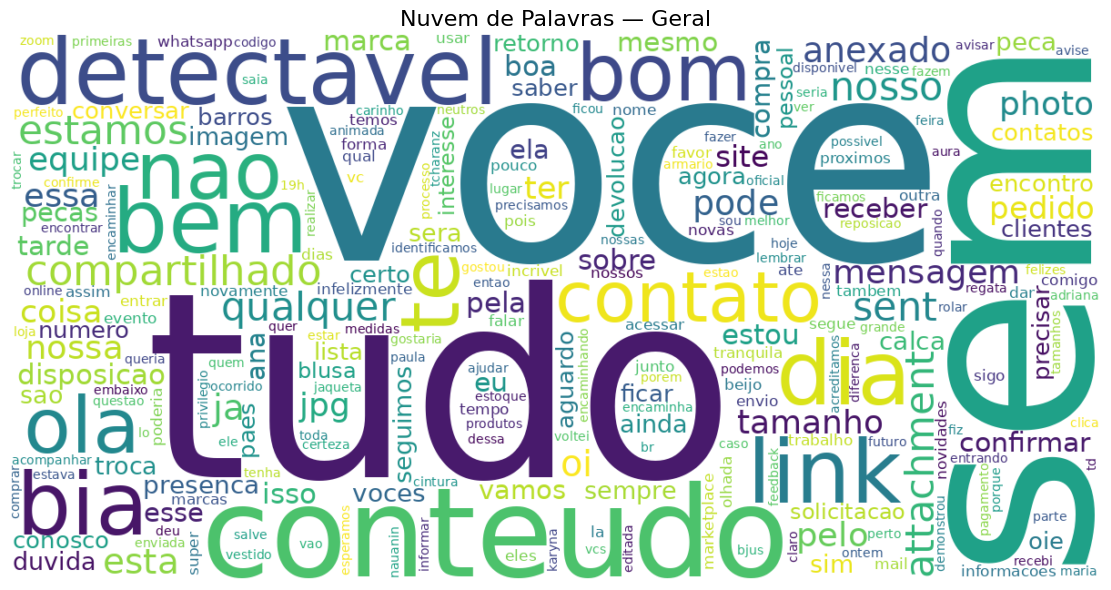

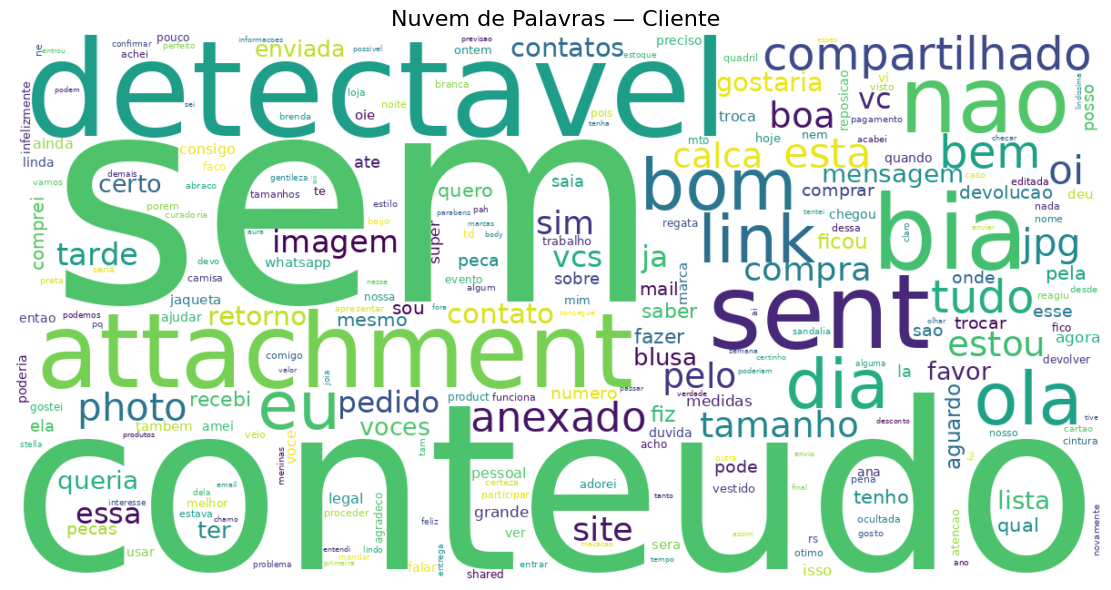

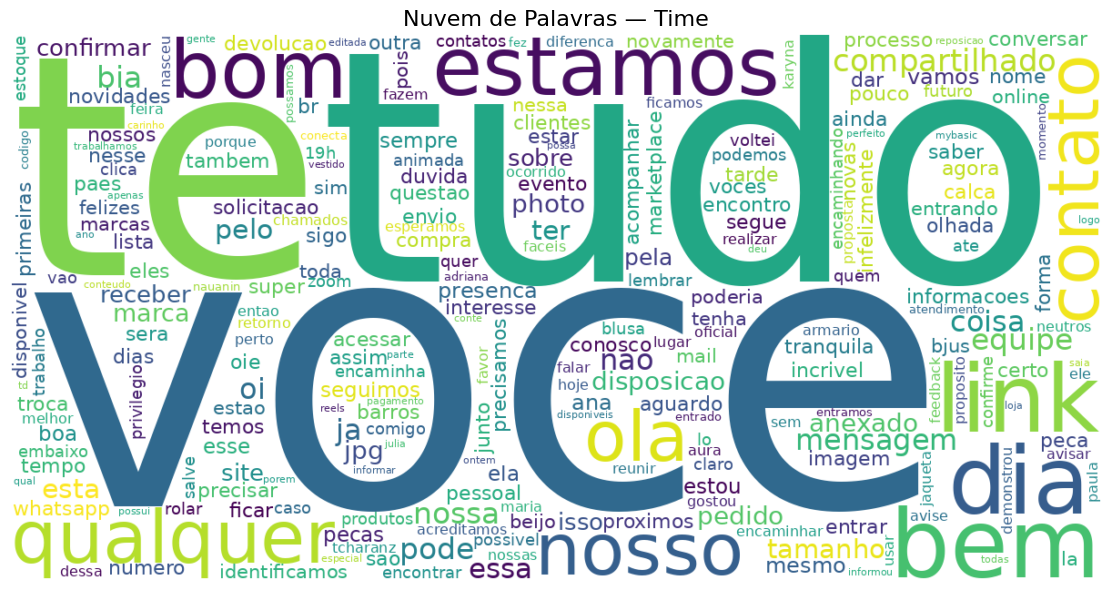

,palavra,frequencia
0,voce,451
1,tudo,381
2,sem,373
3,conteudo,365
4,detectavel,362
5,bem,338
6,dia,337
7,link,332
8,bia,327
9,te,294


,bigram,frequencia
0,sem conteudo,362
1,conteudo detectavel,362
2,tudo bem,293
3,bom dia,225
4,link compartilhado,209
5,sent attachment,192
6,bia sent,155
7,anexado photo,135
8,photo jpg,135
9,qualquer coisa,125



Figuras salvas em: /content/figs
Arquivos gerados:
 - dist_char_len.png
 - dist_char_len_p99.png
 - dist_word_len.png
 - dist_word_len_p99.png
 - top_bigrams_geral.csv
 - top_palavras_geral.csv
 - wc_cliente.png
 - wc_geral.png
 - wc_time.png


In [ ]:
# --- Colab setup (roda uma vez) ---
!pip -q install wordcloud emoji unidecode

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import emoji
from unidecode import unidecode
import matplotlib as mpl

# Caminho do CSV (ajuste se necessário)
CSV_PATH = "/content/all_msgs_whatsapp_instagram.csv"

# Pasta de saída para figuras
OUT_DIR = "/content/figs"
os.makedirs(OUT_DIR, exist_ok=True)

# Fonte TrueType (para evitar o erro de fonte do Pillow/WordCloud)
# Em ambientes Colab, a DejaVuSans costuma existir neste caminho:
FONT_PATH = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
if not os.path.isfile(FONT_PATH):
    # fallback via matplotlib (pega qualquer TTF disponível)
    FONT_PATH = mpl.get_data_path() + "/fonts/ttf/DejaVuSans.ttf"

# ---------------------------
# 1) Carregar dados
# ---------------------------
all_msgs = pd.read_csv(CSV_PATH)

# Garantir colunas esperadas
for col in ["message", "is_system", "char_len", "word_len", "sender_role"]:
    if col not in all_msgs.columns:
        raise ValueError(f"Coluna obrigatória ausente no CSV: {col}")

# Drop mensagens do sistema para análises de conteúdo
text_df = all_msgs.loc[~all_msgs["is_system"].astype(bool)].copy()

# ---------------------------
# 2) Distribuições de comprimento
# ---------------------------
def plot_hist(series, title, xlabel, out_path, bins=60, xlim=None):
    plt.figure(figsize=(9,5))
    series.dropna().astype(float).clip(lower=0).plot(kind="hist", bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequência")
    if xlim:
        plt.xlim(*xlim)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()

plot_hist(
    all_msgs["char_len"],
    "Distribuição do Comprimento (caracteres)",
    "Número de caracteres",
    f"{OUT_DIR}/dist_char_len.png",
    bins=80
)

plot_hist(
    all_msgs["word_len"],
    "Distribuição do Comprimento (palavras)",
    "Número de palavras",
    f"{OUT_DIR}/dist_word_len.png",
    bins=60
)

# (opcional) versões com limite superior para destacar o miolo da distribuição
p99_chars = np.nanpercentile(all_msgs["char_len"], 99)
p99_words = np.nanpercentile(all_msgs["word_len"], 99)

plot_hist(
    all_msgs["char_len"],
    "Distribuição (caracteres) — até p99",
    "Número de caracteres",
    f"{OUT_DIR}/dist_char_len_p99.png",
    bins=80,
    xlim=(0, p99_chars)
)

plot_hist(
    all_msgs["word_len"],
    "Distribuição (palavras) — até p99",
    "Número de palavras",
    f"{OUT_DIR}/dist_word_len_p99.png",
    bins=60,
    xlim=(0, p99_words)
)

# ---------------------------
# 3) Nuvem de palavras
# ---------------------------

# Stopwords (PT-BR + extensões úteis)
custom_stopwords = {
    # base do wordcloud
    *STOPWORDS,
    # pt-br comuns
    "de","da","do","das","dos","a","o","as","os","e","é","em","um","uma","para","por","com",
    "na","no","nas","nos","se","que","ou","ao","à","às","aos","às","à","àquele","àquela",
    "mas","já","como","são","ser","tem","tá","tô","vai","vai","vou","foi","era","sua","seu","suas","seus",
    "pra","pro","lá","aqui","ali","um","uma","uns","umas","meu","minha","meus","minhas","tua","teu","tuas","teus",
    "você","vocês","sua","seu","mais","menos","muito","muita","muitos","muitas",
    # ruídos de chat
    "tipo","né","ah","eh","ehh","aham","ok","okay","beleza","blz","valeu","obg","obrigado","obrigada",
    "curadobia","cliente", # nomes/roles do seu dataset (remover se quiserem aparecer)
}

# Regex para remoção de URLs, menções e números
url_re   = re.compile(r"https?://\S+|www\.\S+", re.I)
mention_re = re.compile(r"@[A-Za-z0-9_]+")
num_re = re.compile(r"\b\d+\b")

def normalize_text(s: str) -> str:
    """Normaliza texto: remove urls/menções/números, emojis, acentos e pontuação básica."""
    s = s.lower()
    s = url_re.sub(" ", s)
    s = mention_re.sub(" ", s)
    s = emoji.replace_emoji(s, replace=" ")
    s = num_re.sub(" ", s)
    # tira acentos
    s = unidecode(s)
    # remove pontuação simples
    s = re.sub(r"[^\w\s]", " ", s)
    # normaliza espaços
    s = re.sub(r"\s+", " ", s).strip()
    return s

def build_word_frequencies(series, extra_stopwords=None, min_len=2):
    stop = set(custom_stopwords)
    if extra_stopwords:
        stop |= set(map(str.lower, extra_stopwords))
    tokens = []
    for txt in series.dropna().astype(str):
        nt = normalize_text(txt)
        words = [w for w in nt.split() if (len(w) >= min_len and w not in stop)]
        tokens.extend(words)
    return Counter(tokens)

def make_wordcloud_from_freq(freq: Counter, title: str, outfile: str, max_words=250):
    if not freq:
        print(f"[aviso] Frequências vazias para '{title}'.")
        return
    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        font_path=FONT_PATH,
        collocations=False,
        max_words=max_words
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(outfile, dpi=150)
    plt.show()

# Nuvem geral (todas as mensagens não-sistema)
freq_all = build_word_frequencies(text_df["message"])
make_wordcloud_from_freq(freq_all, "Nuvem de Palavras — Geral", f"{OUT_DIR}/wc_geral.png")

# Nuvem por papel (cliente vs time)
for role in ["cliente", "time"]:
    sub = text_df.loc[text_df["sender_role"].astype(str).str.lower() == role, "message"]
    freq_role = build_word_frequencies(sub)
    make_wordcloud_from_freq(freq_role, f"Nuvem de Palavras — {role.title()}", f"{OUT_DIR}/wc_{role}.png")

# ---------------------------
# 4) Extras úteis (opcional)
# ---------------------------

# a) Top N palavras (tabela rápida)
def show_top_words(freq: Counter, topn=30):
    top = pd.DataFrame(freq.most_common(topn), columns=["palavra","frequencia"])
    display(top)
    return top

top_all = show_top_words(freq_all, 40)

# b) Bigramas simples (duas palavras seguidas) — útil para expressões frequentes
def build_bigrams(series, min_len=2, stop=None):
    if stop is None:
        stop = set(custom_stopwords)
    bigrams = Counter()
    for txt in series.dropna().astype(str):
        nt = normalize_text(txt)
        toks = [w for w in nt.split() if (len(w) >= min_len and w not in stop)]
        for i in range(len(toks)-1):
            bg = f"{toks[i]} {toks[i+1]}"
            bigrams[bg] += 1
    return bigrams

bigrams_all = build_bigrams(text_df["message"])
top_bigrams = pd.DataFrame(bigrams_all.most_common(30), columns=["bigram","frequencia"])
display(top_bigrams)

# c) Salvar tabelas
top_all.to_csv(f"{OUT_DIR}/top_palavras_geral.csv", index=False)
top_bigrams.to_csv(f"{OUT_DIR}/top_bigrams_geral.csv", index=False)

print(f"\nFiguras salvas em: {OUT_DIR}")
print("Arquivos gerados:")
for f in sorted(os.listdir(OUT_DIR)):
    print(" -", f)


,intencao,frequencia
0,outros,2030
1,saudacao,636
2,agradecimento,188
3,pedido_suporte,72
4,pergunta_sobre_produto,29
5,pedido_compra,7


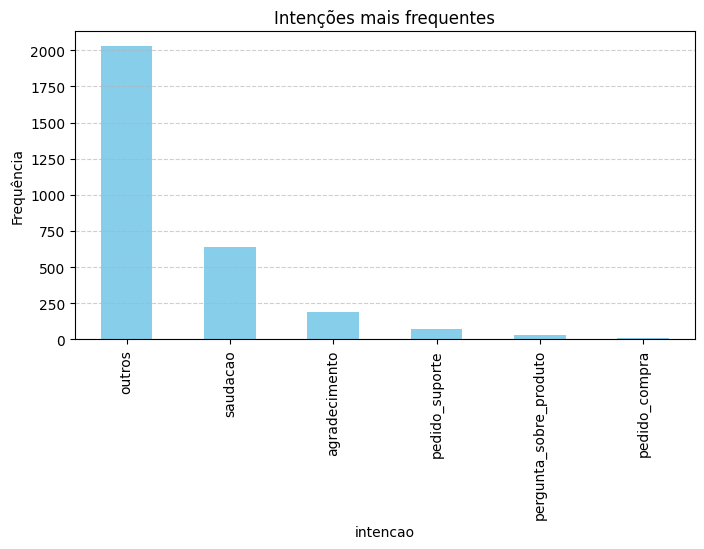

In [ ]:
# Exemplo de intenções que você pode adaptar
intent_keywords = {
    "pergunta_sobre_produto": ["preço", "valor", "quanto", "tem estoque", "disponível", "parcelamento"],
    "pedido_suporte": ["problema", "erro", "não funciona", "bug", "suporte", "ajuda", "assistência"],
    "pedido_compra": ["quero comprar", "fechar pedido", "enviar orçamento", "quero adquirir", "finalizar"],
    "saudacao": ["bom dia", "boa tarde", "boa noite", "olá", "oi", "tudo bem"],
    "agradecimento": ["obrigado", "obrigada", "valeu", "muito grato", "agradeço"]
}

def detectar_intencao(msg: str):
    msg_norm = normalize_text(msg)  # usa função do script anterior
    for intent, keywords in intent_keywords.items():
        for kw in keywords:
            if kw in msg_norm:
                return intent
    return "outros"

# Aplicar nas mensagens (apenas não-sistema e clientes, por exemplo)
text_df["intencao"] = text_df["message"].apply(detectar_intencao)

# Frequência das intenções
intent_counts = text_df["intencao"].value_counts().reset_index()
intent_counts.columns = ["intencao", "frequencia"]
display(intent_counts)

# Plot
plt.figure(figsize=(8,4))
intent_counts.set_index("intencao")["frequencia"].plot(kind="bar", color="skyblue")
plt.ylabel("Frequência")
plt.title("Intenções mais frequentes")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Apenas mensagens de cliente, não-sistema
msgs_cliente = text_df.loc[text_df["sender_role"] == "cliente", "message"].dropna()

# Vetorização
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words=list(custom_stopwords))
X = vectorizer.fit_transform(msgs_cliente)

# Número de clusters (tente ajustar depois de olhar os resultados)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Adicionar rótulo ao dataframe
clusters = kmeans.labels_
msgs_cliente_df = pd.DataFrame({"mensagem": msgs_cliente, "cluster": clusters})

# Palavras mais representativas por cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(n_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}:", ", ".join(top_terms))


Cluster 0: reagiu, mensagem, deu, devo, devolução, devolver, dia, dúvida, imagem, ela
Cluster 1: detectável, conteúdo, sem, devo, devolução, devolver, dia, dúvida, editada, deu
Cluster 2: sent, attachment, bia, brenda, stella, devolução, devolver, dia, dúvida, editada
Cluster 3: não, eu, site, recebi, estou, compra, trocar, está, ainda, calça
Cluster 4: compartilhado, link, enviar, devo, devolução, devolver, dia, dúvida, editada, ela
Cluster 5: anexado, jpg, photo, 2024, 11, 12, 09, 16, 10, 14
Cluster 6: bom, dia, olá, oi, tudo, bem, sim, imagem, está, enviada
Cluster 7: onde, comprar, olá, sandália, essa, posso, calça, loja, macacão, envio


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
